In [1]:
# Dependencies and Setup
import hvplot.pandas
import holoviews


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import API key 
from api_keys import geoapify_key

# Stretch Jupyter to a greater width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [3]:
# Read in Happiness dataset and Cost of living dataset
hap_df = pd.read_csv('./Resources/2022.csv')
hap_df = hap_df[['Country', 'Happiness score']]
hap_df.columns = ['Country', 'Happiness Score']
cost_df = pd.read_csv('./Resources/Cost_of_Living_Index_2022.csv')
cost_df = cost_df[['Country', 'Local Purchasing Power Index', 'Cost of Living Index']]

print(hap_df.head())
cost_df.head()

       Country Happiness Score
0      Finland           7,821
1      Denmark           7,636
2      Iceland           7,557
3  Switzerland           7,512
4  Netherlands           7,415


,Country,Local Purchasing Power Index,Cost of Living Index
0,Afghanistan,23.04,20.37
1,Albania,30.19,35.50
2,Algeria,24.63,26.87
3,Argentina,30.72,34.69
4,Armenia,28.86,33.89


In [4]:
# Merging happiness and cost of living dataframes
HappinessCostOfLiving_df = hap_df.merge(cost_df, how='inner', on='Country')
HappinessCostOfLiving_df_str = "HappinessCostOfLiving_df1"
HappinessCostOfLiving_df.head()

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index
0,Finland,"7,821",91.02,73.20
1,Denmark,"7,636",99.45,84.12
2,Iceland,"7,557",77.06,94.86
3,Switzerland,"7,512",118.44,123.35
4,Netherlands,"7,415",87.99,75.66


In [5]:
# Country Count
HappinessCostOfLiving_df.count()

Country                         106
Happiness Score                 106
Local Purchasing Power Index    106
Cost of Living Index            106
dtype: int64

In [6]:
# Read in Country and Capital dataset to get longitude and latitude
capCoord_df = pd.read_csv('./Resources/country-capitals.csv', on_bad_lines='skip')
print(capCoord_df.columns)
del capCoord_df['CountryCode']
del capCoord_df['ContinentName']
capCoord_df.columns = ['Country', 'Capital', 'Latitude', 'Longitude']
print(capCoord_df.columns)

capCoord_df.head()

Index(['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude',
       'CountryCode', 'ContinentName'],
      dtype='object')
Index(['Country', 'Capital', 'Latitude', 'Longitude'], dtype='object')


,Country,Capital,Latitude,Longitude
0,Somaliland,Hargeisa,9.550000,44.050000
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667
3,Palestine,Jerusalem,31.766667,35.233333
4,Aland Islands,Mariehamn,60.116667,19.900000


In [7]:
# Merge long and latitude to HappinessCostOfLiving_df
HappinessCostOfLiving_df = HappinessCostOfLiving_df.merge(capCoord_df, how='inner', on='Country')
HappinessCostOfLiving_df.head()

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
0,Finland,"7,821",91.02,73.20,Helsinki,60.166667,24.933333
1,Denmark,"7,636",99.45,84.12,Copenhagen,55.666667,12.583333
2,Iceland,"7,557",77.06,94.86,Reykjavik,64.150000,-21.950000
3,Switzerland,"7,512",118.44,123.35,Bern,46.916667,7.466667
4,Netherlands,"7,415",87.99,75.66,Amsterdam,52.350000,4.916667


In [8]:
# Change Happiness Score from object to float
HappinessCostOfLiving_df['Happiness Score'] = HappinessCostOfLiving_df['Happiness Score'].str.replace(",", "").astype('float')
HappinessCostOfLiving_df.dtypes


Country                          object
Happiness Score                 float64
Local Purchasing Power Index    float64
Cost of Living Index            float64
Capital                          object
Latitude                        float64
Longitude                       float64
dtype: object

In [9]:
# Sort Countries by "Country"
srt_df= HappinessCostOfLiving_df.sort_values(by='Country')
print(HappinessCostOfLiving_df.count())
srt_df.head()

Country                         103
Happiness Score                 103
Local Purchasing Power Index    103
Cost of Living Index            103
Capital                         103
Latitude                        103
Longitude                       103
dtype: int64


,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
102,Afghanistan,2404.0,23.04,20.37,Kabul,34.516667,69.183333
72,Albania,5199.0,30.19,35.50,Tirana,41.316667,19.816667
75,Algeria,5122.0,24.63,26.87,Algiers,36.750000,3.050000
49,Argentina,5967.0,30.72,34.69,Buenos Aires,-34.583333,-58.666667
68,Armenia,5399.0,28.86,33.89,Yerevan,40.166667,44.500000


In [10]:
# Plot Countries from HappinessCostOfLiving_df on global map
happiestplot = HappinessCostOfLiving_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.1,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(happiestplot, f'./Output/map_all_cities_in_{HappinessCostOfLiving_df_str}', fmt='png')

happiestplot

C:\Users\T852\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [11]:
# Get top 20 happiest countries
top20Happiness_df = HappinessCostOfLiving_df.sort_values('Happiness Score', ascending=False).head(20)
top20Happiness_df_str = "top20Happiness_df2"
top20Happiness_df

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667
5,Sweden,7384.0,98.14,71.74,Stockholm,59.333333,18.050000
6,Norway,7365.0,83.11,100.90,Oslo,59.916667,10.750000
7,Israel,7364.0,75.58,88.05,Jerusalem,31.766667,35.233333
8,New Zealand,7200.0,83.63,74.52,Wellington,-41.300000,174.783333
9,Austria,7163.0,77.25,71.04,Vienna,48.200000,16.366667


In [12]:
# Plot all countries in top20Happiness_df
top20HappinessPlot = top20Happiness_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.15,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(top20HappinessPlot, f'./Output/map_all_cities_in_{top20Happiness_df_str}', fmt='png')

top20HappinessPlot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [13]:
# Get top 20 least happy countries
bottom20Hap = HappinessCostOfLiving_df.sort_values('Happiness Score').head(20)
bottom20Hap_str = 'bottom20Hap3'
bottom20Hap

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
102,Afghanistan,2404.0,23.04,20.37,Kabul,34.516667,69.183333
101,Lebanon,2955.0,35.12,69.62,Beirut,33.866667,35.500000
100,Zimbabwe,2995.0,19.07,45.68,Harare,-17.816667,31.033333
99,Tanzania,3702.0,15.97,32.81,Dar es Salaam,-6.800000,39.283333
98,Zambia,3760.0,40.33,33.04,Lusaka,-15.416667,28.283333
97,India,3777.0,49.72,24.43,New Delhi,28.600000,77.200000
96,Jordan,4152.0,31.34,49.19,Amman,31.950000,35.933333
95,Ethiopia,4241.0,10.15,47.49,Addis Ababa,9.033333,38.700000
94,Egypt,4288.0,21.54,29.52,Cairo,30.050000,31.250000
93,Sri Lanka,4362.0,19.27,31.29,Colombo,6.916667,79.833333


In [14]:
# Plot all countries in top20Happiness_df
bottom20HapPlot = bottom20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.3,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(bottom20HapPlot, f'./Output/map_all_cities_in_{bottom20Hap_str}', fmt='png')

bottom20HapPlot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [15]:
# Display count of HappinessCostOfLiving_df
HappinessCostOfLiving_df.count()

Country                         103
Happiness Score                 103
Local Purchasing Power Index    103
Cost of Living Index            103
Capital                         103
Latitude                        103
Longitude                       103
dtype: int64

In [16]:
# Create crime_df
crime_df = pd.read_csv('./Resources/WorldCrimeIndex.csv', encoding='utf-8')

crime_df.head()

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29


In [17]:
# Separate country from city
df = crime_df['City'].str.split(", ", expand=True)
# crime_df.rename(columns={'City':"Country"})
df.head()

,0,1,2
0,Caracas,Venezuela,None
1,Pretoria,South Africa,None
2,Celaya,Mexico,None
3,San Pedro Sula,Honduras,None
4,Port Moresby,Papua New Guinea,None


In [18]:
# Add and fill country column to crime_df
crime_df['Country'] = df[1]

# Delete city column
del crime_df['City']
crime_df = crime_df.groupby('Country').mean()
crime_df.head(30)

,Rank,Crime Index,Safety Index
Country,,,
AB,55.000000,63.890000,36.110000
AK,68.000000,62.270000,37.730000
AZ,158.500000,51.260000,48.740000
Afghanistan,8.000000,79.390000,20.610000
Albania,230.000000,44.500000,55.500000
Algeria,130.000000,53.880000,46.120000
Angola,40.000000,67.450000,32.550000
Argentina,51.666667,66.273333,33.726667
Armenia,428.000000,21.660000,78.340000


In [19]:
# Merge HappinessCostOfLiving_df with crime_df
HappinessCostOfLivingCrime_df = HappinessCostOfLiving_df.copy().merge(crime_df, how='inner', on='Country')
print(HappinessCostOfLivingCrime_df.count())
HappinessCostOfLivingCrime_df.head()


Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Rank                            94
Crime Index                     94
Safety Index                    94
dtype: int64


,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Rank,Crime Index,Safety Index
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,380.333333,27.763333,72.236667
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,411.000000,24.270000,75.730000
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,421.000000,23.020000,76.980000
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,427.833333,21.156667,78.843333
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,385.500000,27.235000,72.765000


In [20]:
# Drop rows that contained NAN
print(HappinessCostOfLivingCrime_df.count())
no_na_df = HappinessCostOfLivingCrime_df.dropna()
no_na_df.count()

Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Rank                            94
Crime Index                     94
Safety Index                    94
dtype: int64


Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Rank                            94
Crime Index                     94
Safety Index                    94
dtype: int64

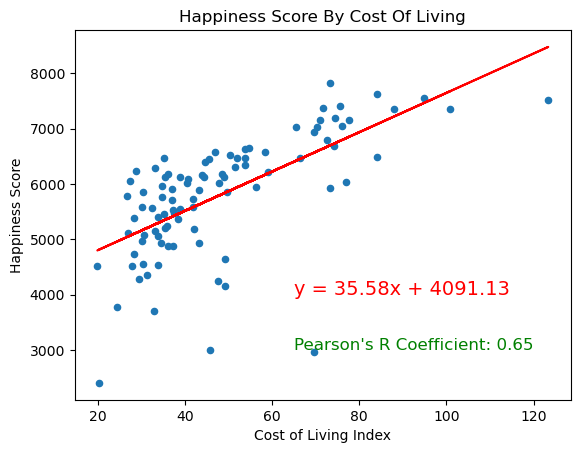

In [21]:
# Find linear regression parameters Cost of Living Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Cost of Living Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Cost of Living Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Cost of Living Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
plt.plot(HappinessCostOfLivingCrime_df['Cost of Living Index'], yregressLin, color='red')
plt.annotate(equation, (65, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (65, 3000), color='green', size = 12)
plt.title('Happiness Score By Cost Of Living')
fig = plt.gcf()
plt.show()

In [22]:
# Create png name
figureTitle = 'HappinessCostLiving4'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")


Pearson's R Coefficient: 0.4386302852303171


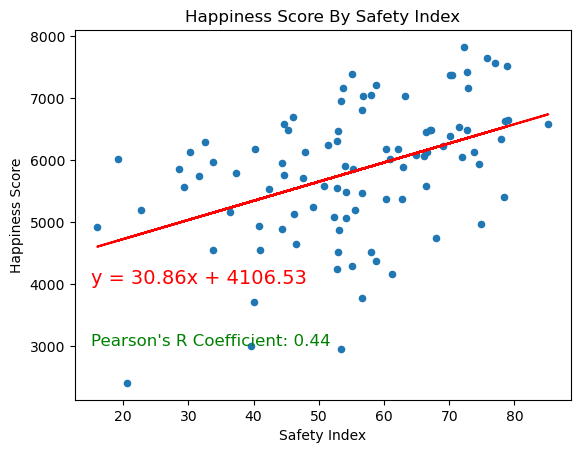

In [23]:
# Find linear regression parameters Safety Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Safety Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Safety Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Safety Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
print(f"Pearson's R Coefficient: {r}")
plt.plot(HappinessCostOfLivingCrime_df['Safety Index'], yregressLin, color='red')
plt.annotate(equation, (15, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (15, 3000), color='green', size = 12)
plt.title('Happiness Score By Safety Index')
fig = plt.gcf()
plt.show()

In [24]:
# Create png name
figureTitle = 'HappinessSafety5'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")

Pearson's R Coefficient: 0.7221735991986103


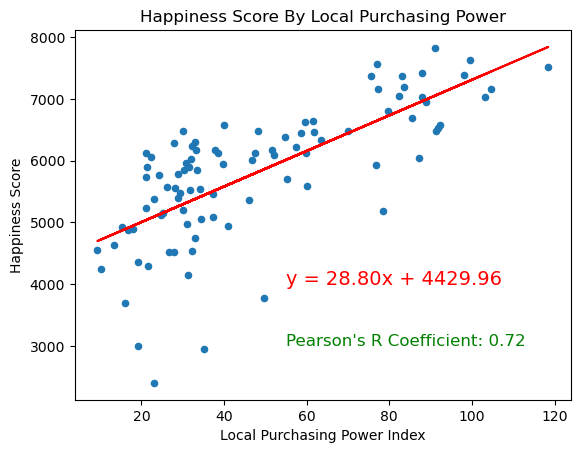

In [25]:
# Find linear regression parameters Local Purchasing Power Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Local Purchasing Power Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Local Purchasing Power Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
print(f"Pearson's R Coefficient: {r}")
plt.plot(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'], yregressLin, color='red')
plt.annotate(equation, (55, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (55, 3000), color='green', size = 12)
plt.title('Happiness Score By Local Purchasing Power')
fig = plt.gcf()
plt.show()

In [26]:
# Create png name
figureTitle = 'HappinessPurchasing6'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")


<IPython.core.display.Javascript object>


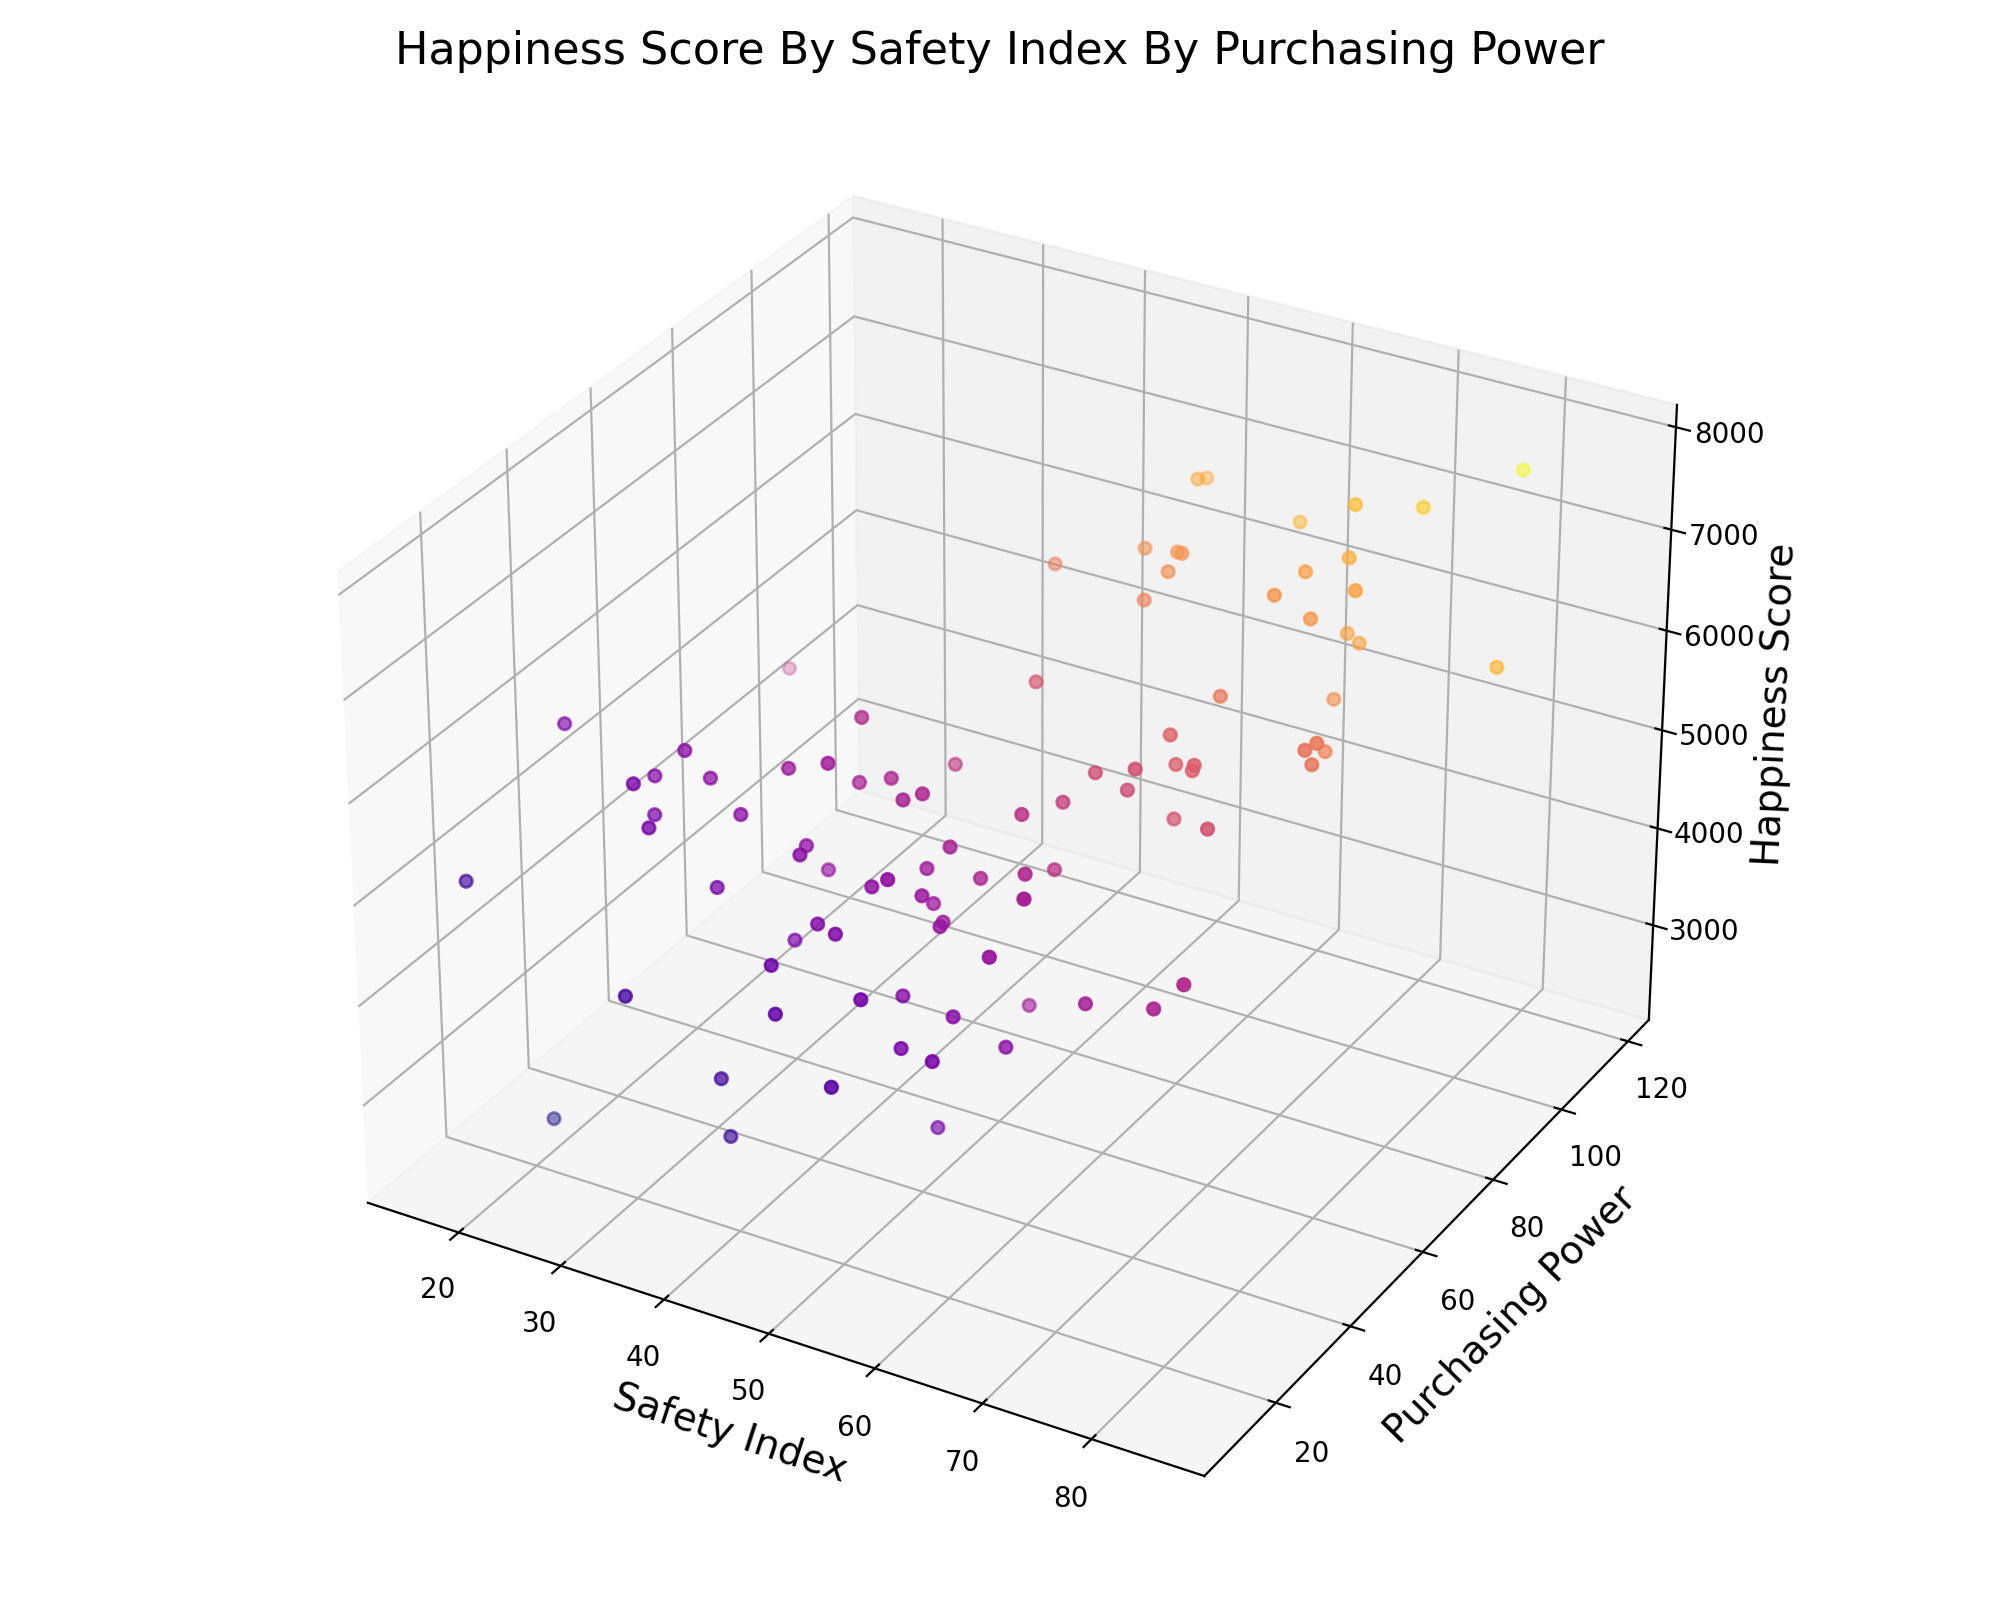

In [27]:
%matplotlib notebook

# Plot Happiness by Local Purchasing Power Index by Safety Index
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax = fig.add_subplot(projection='3d')
x = HappinessCostOfLivingCrime_df['Safety Index']
xlabel = 'Safety Index'
y = HappinessCostOfLivingCrime_df['Local Purchasing Power Index']
ylabel = 'Purchasing Power'
z = HappinessCostOfLivingCrime_df['Happiness Score']
zlabel = 'Happiness Score'
colors = np.random.rand(367)
# bin = [3000, 3500, 4000, 4500, 5000 ]
topHap = HappinessCostOfLivingCrime_df['Happiness Score'].sort_values(ascending=False).head(1).values[0]
topPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topSafety = HappinessCostOfLivingCrime_df['Safety Index'].sort_values(ascending=False).head(1).values[0]
red = HappinessCostOfLivingCrime_df['Happiness Score']/topHap
green = HappinessCostOfLivingCrime_df['Local Purchasing Power Index']/topSafety
blue = HappinessCostOfLivingCrime_df['Safety Index']/topPurch 
triple = (red+ green+blue)/3

ax.scatter(x, y, z, cmap='plasma', c=triple)# xlabel=xlabel, ylabel=ylabel)
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
ax.set_zlabel(zlabel, fontsize=14)
plt.subplots_adjust(right=0.5, bottom=0.5)
plt.title('Happiness Score By Safety Index By Purchasing Power', fontsize=16)

plt.show()

In [28]:
# Create png name
figureTitle = 'UnNormalizedHappinessCostSafety7'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [29]:
# Find minimum values for Happiness Score, Local Purchasing Power Index, and Safety Index  
bottomHap = HappinessCostOfLivingCrime_df['Happiness Score'].sort_values().head(1).values[0] # just use .min()
bottomPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].sort_values().head(1).values[0]
bottompSafety = HappinessCostOfLivingCrime_df['Safety Index'].sort_values().head(1).values[0]

# Find maximum values for Happiness Score, Local Purchasing Power Index, and Safety Index  
topHap = HappinessCostOfLivingCrime_df['Happiness Score'].sort_values(ascending=False).head(1).values[0] # just use .max()
topPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topSafety = HappinessCostOfLivingCrime_df['Safety Index'].sort_values(ascending=False).head(1).values[0]

# Create columns for normalized values for Happiness Score, Local Purchasing Power Index, and Safety Index  
HappinessCostOfLivingCrime_df['Normalized Happiness'] = (HappinessCostOfLivingCrime_df['Happiness Score'] - bottomHap) / (topHap - bottomHap)
HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] = (HappinessCostOfLivingCrime_df['Local Purchasing Power Index'] - bottomPurch) / (topPurch - bottomPurch)
HappinessCostOfLivingCrime_df['Normalized Safety'] = (HappinessCostOfLivingCrime_df['Safety Index'] - bottompSafety) / (topSafety - bottompSafety)
HappinessCostOfLivingCrime_df.head()


,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Rank,Crime Index,Safety Index,Normalized Happiness,Normalized Local Purchasing Power,Normalized Safety
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,380.333333,27.763333,72.236667,1.000000,0.748671,0.812908
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,411.000000,24.270000,75.730000,0.965848,0.825940,0.863423
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,421.000000,23.020000,76.980000,0.951265,0.620715,0.881498
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,427.833333,21.156667,78.843333,0.942957,1.000000,0.908442
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,385.500000,27.235000,72.765000,0.925051,0.720898,0.820548


<IPython.core.display.Javascript object>


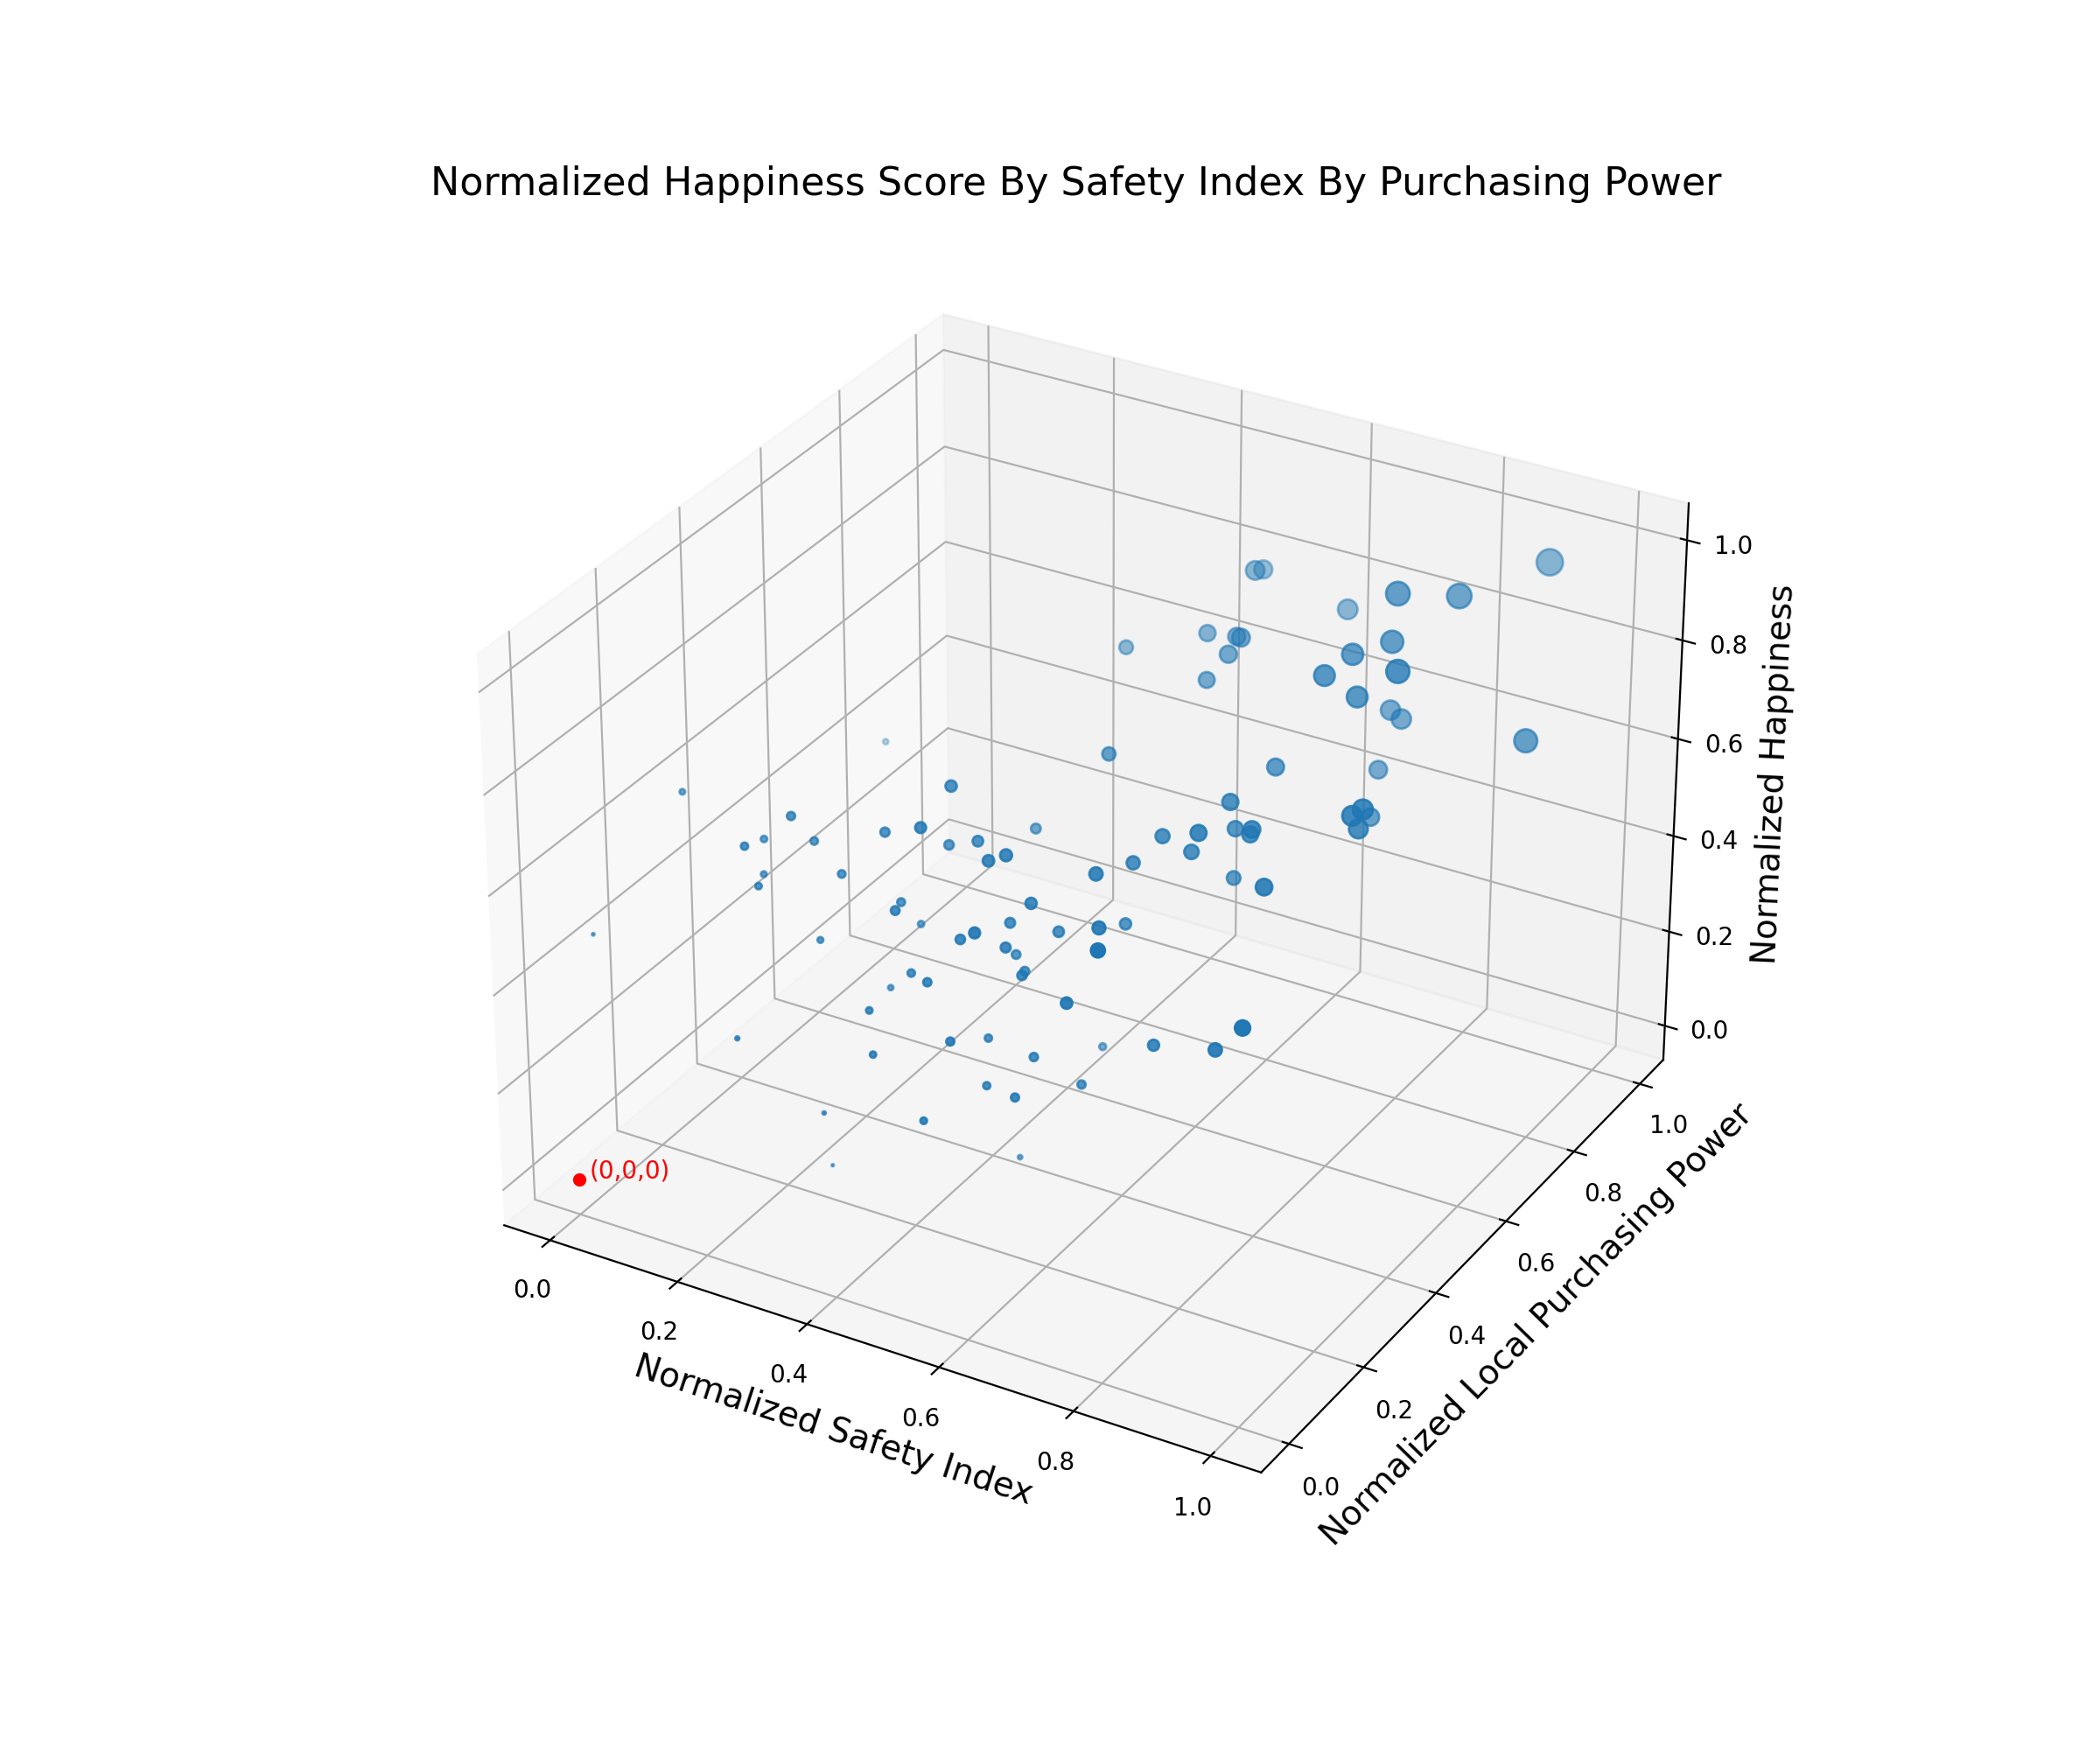

C:\Users\T852\AppData\Local\Temp\ipykernel_42544\2089002612.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  fg = ax.scatter3D(HappinessCostOfLivingCrime_df['Normalized Safety'],


Text(0.5, 0, 'Normalized Happiness')

In [37]:
%matplotlib notebook

# Create weights for combining normalized Happiness Score, Local Purchasing Power Index, and Safety Index into a single value
weightHap = 1
weightPurch = 1
weightSafety = 1

# Create a new column by combining the three metrics (Normalized Happiness, Safety, Purchasing Power) into one metric
HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)

# Plot normalized-combined metric 'Equally Weighted Safety, Purchasing, and Happiness'
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# print(HappinessCostOfLivingCrime_df)
# Find min
minimumEquallyWeighted = HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness'].min()

# Size of datapoint will increase with distance from origin (0,0,0)
fg = ax.scatter3D(HappinessCostOfLivingCrime_df['Normalized Safety'], 
                  HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'],
                  HappinessCostOfLivingCrime_df['Normalized Happiness'], 
                  s = 40 * (HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness'] - minimumEquallyWeighted)**3,
                  cmap='plasma'
                  )

# Labels
ax.set_title('Normalized Happiness Score By Safety Index By Purchasing Power', fontsize=16)
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.01,0.01,0, '(0,0,0)', color = 'red')
ax.set_xlabel('Normalized Safety Index', fontsize=14)
ax.set_ylabel('Normalized Local Purchasing Power', fontsize=14)
ax.set_zlabel('Normalized Happiness', fontsize=14)

In [38]:
# Create png name
figureTitle = 'NormalizedHappinessCostSafety8'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [39]:
# Calculate and create columns for Z-scores of Happiness Score, Local Purchasing Power Index, and Safety Index
from scipy.stats import zscore
HappinessCostOfLivingCrime_df['Z-Score Happiness Score'] = zscore(HappinessCostOfLivingCrime_df['Happiness Score'])
HappinessCostOfLivingCrime_df['Z-Score Safety Index'] = zscore(HappinessCostOfLivingCrime_df['Safety Index'])
HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power'] = zscore(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'])
HappinessCostOfLivingCrime_df.head()

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Rank,Crime Index,Safety Index,Normalized Happiness,Normalized Local Purchasing Power,Normalized Safety,"Equally Weighted Safety, Purchasing, and Happiness",Z-Score Happiness Score,Z-Score Safety Index,Z-Score Local Purchasing Power
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,380.333333,27.763333,72.236667,1.000000,0.748671,0.812908,2.801275,1.878166,1.117736,1.605072
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,411.000000,24.270000,75.730000,0.965848,0.825940,0.863423,2.831798,1.705324,1.347331,1.919171
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,421.000000,23.020000,76.980000,0.951265,0.620715,0.881498,2.780783,1.631516,1.429486,1.084926
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,427.833333,21.156667,78.843333,0.942957,1.000000,0.908442,2.901247,1.589473,1.551951,2.626732
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,385.500000,27.235000,72.765000,0.925051,0.720898,0.820548,2.745890,1.498848,1.152460,1.492175


<IPython.core.display.Javascript object>


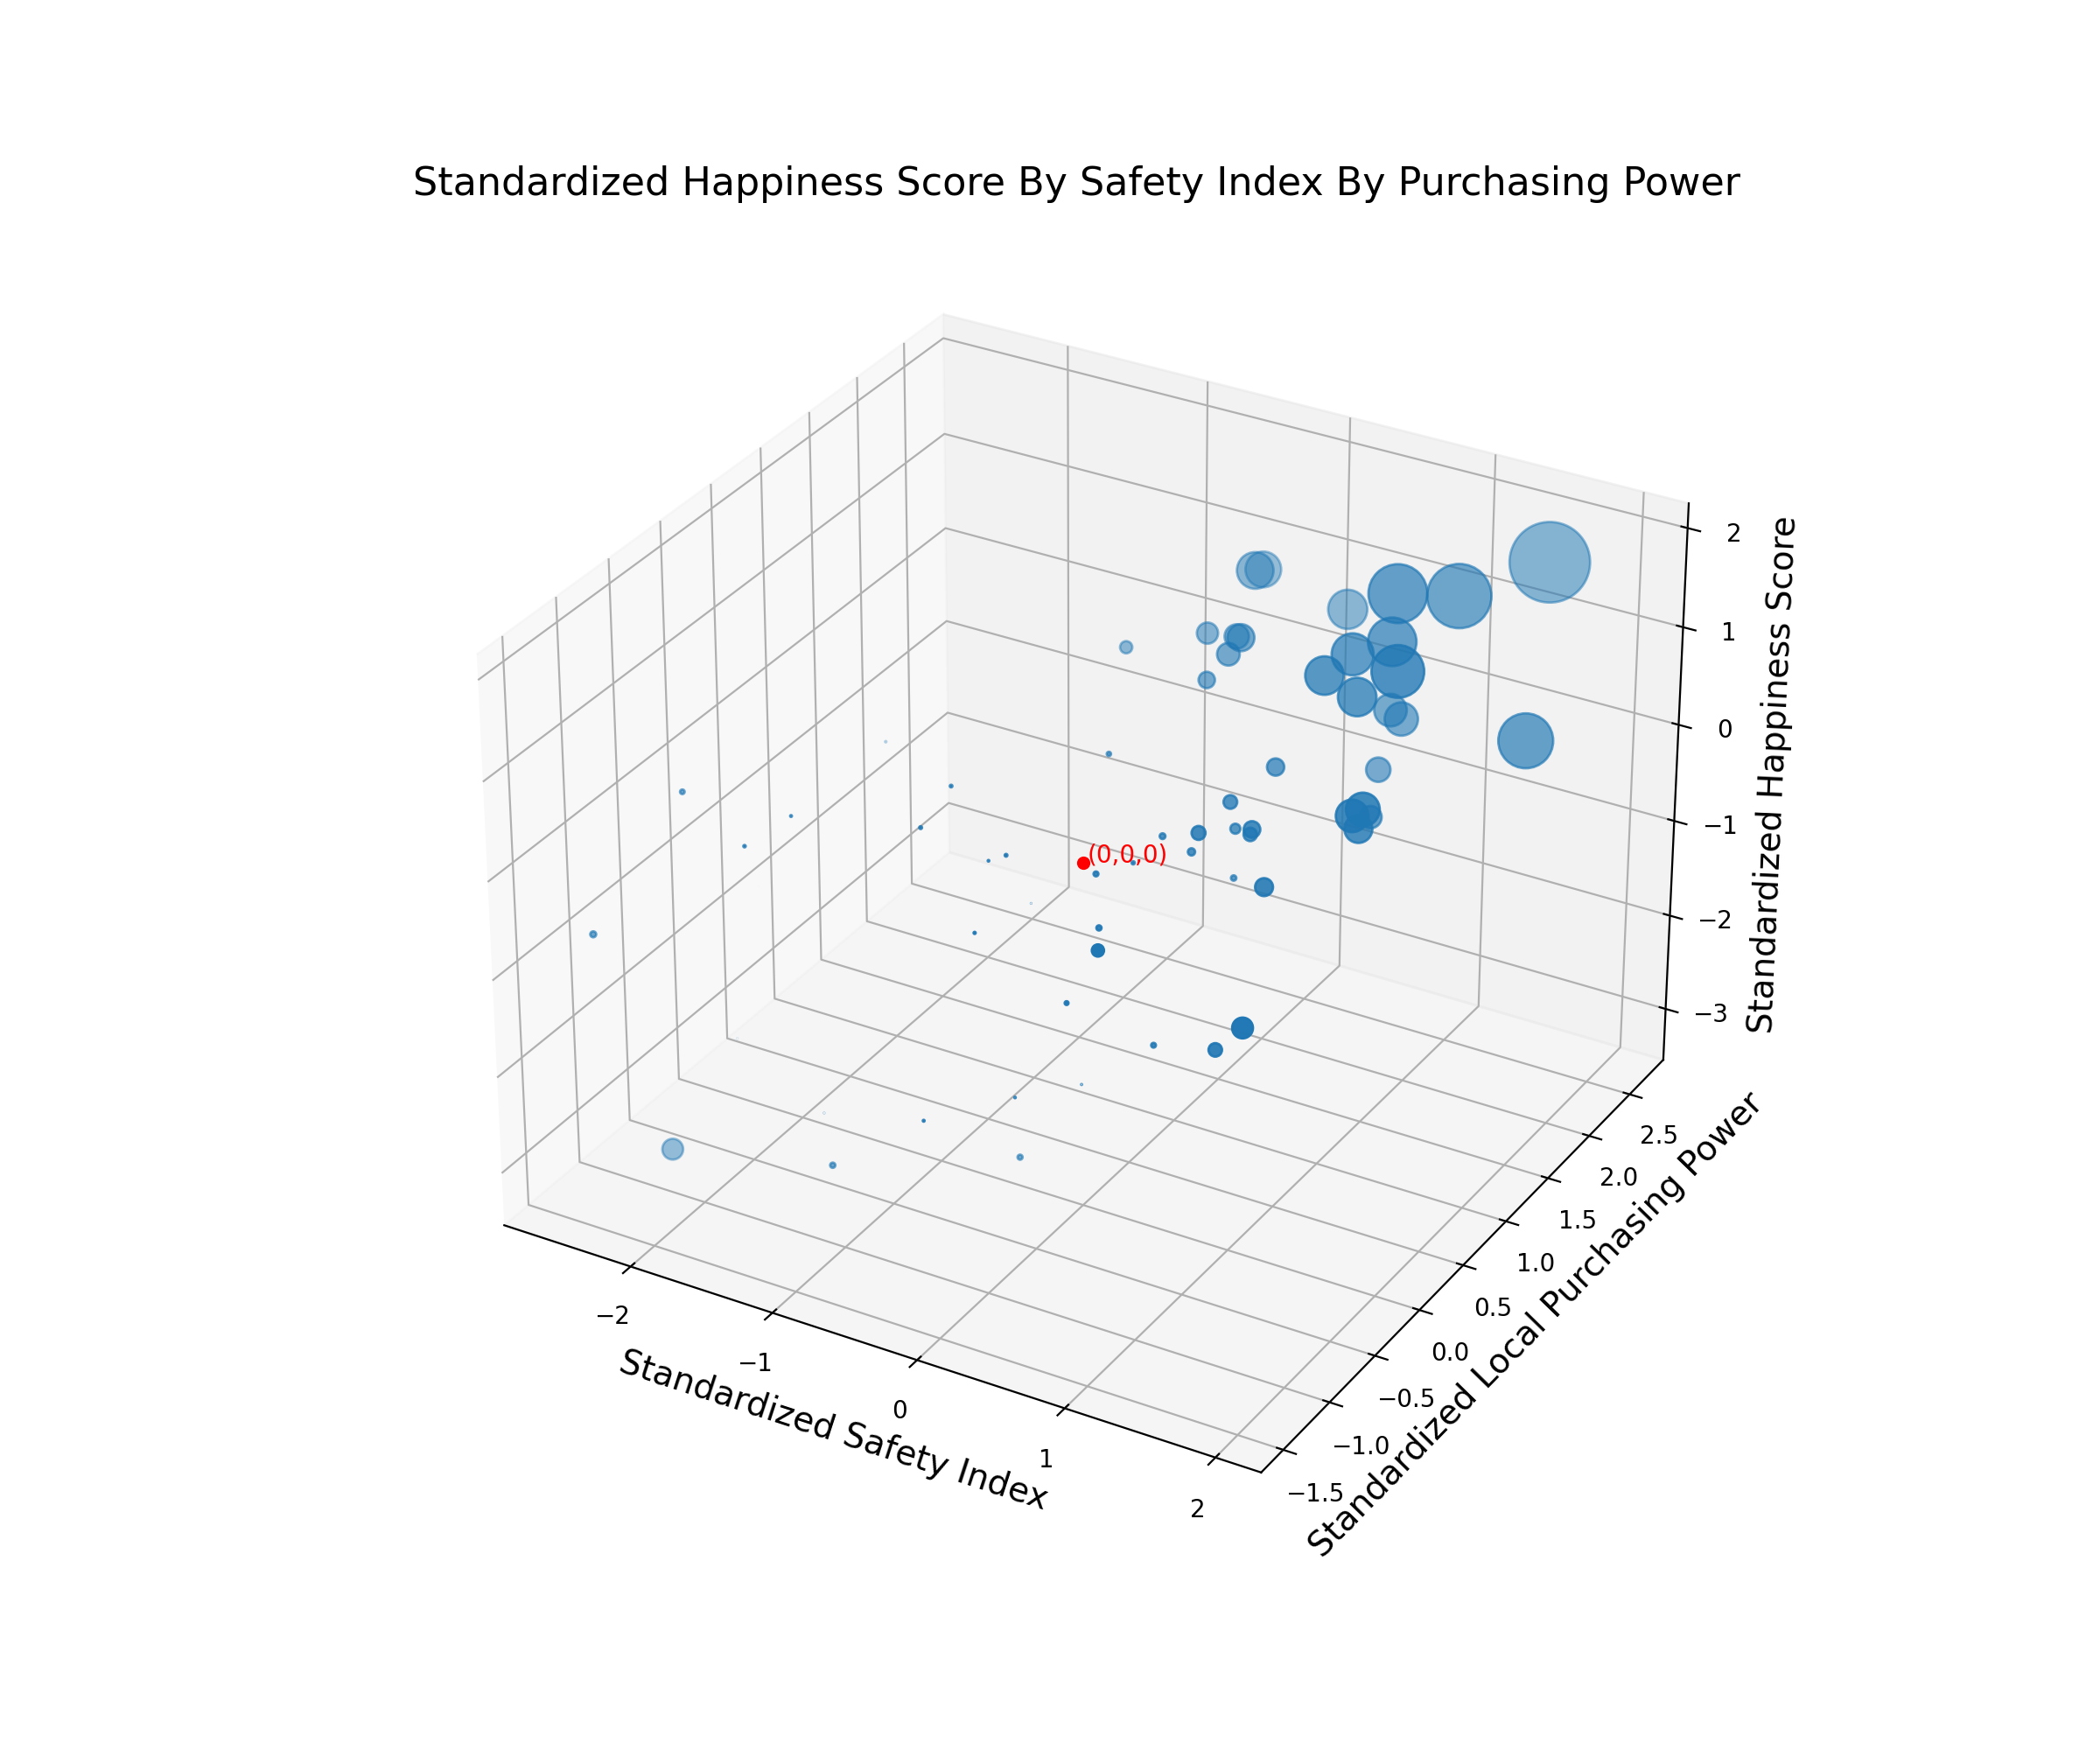

C:\Users\T852\AppData\Local\Temp\ipykernel_42544\2740807069.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  fg = ax.scatter3D(HappinessCostOfLivingCrime_df['Z-Score Safety Index'],


Text(0.02, 0.02, '(0,0,0)')

In [42]:
%matplotlib notebook

# Create weights for combining Z-score Happiness Score, Z-score Local Purchasing Power Index, and Z-score Safety Index into a single value
weightHap = 1
weightPurch = 1
weightSafety = 1

# Create a new column by combining the three metrics (Normalized Happiness, Safety, Purchasing Power) into one metric
HappinessCostOfLivingCrime_df['Equally Weighted Z-Score Safety, Purchasing, and Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Z-Score Safety Index'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Z-Score Happiness Score'] + weightHap)**2)

# Plot normalized-combined metric 'Equally Weighted Safety, Purchasing, and Happiness'
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# print(HappinessCostOfLivingCrime_df)
# Find min
minimumEquallyWeighted = HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness'].min()

# Size of datapoint will increase with distance from origin (0,0,0)
fg = ax.scatter3D(HappinessCostOfLivingCrime_df['Z-Score Safety Index'], 
                  HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power'],
                  HappinessCostOfLivingCrime_df['Z-Score Happiness Score'], 
                  s = 40 * (HappinessCostOfLivingCrime_df['Equally Weighted Z-Score Safety, Purchasing, and Happiness'] - minimumEquallyWeighted)**3,
                  cmap='plasma'
                  )

# Labels
ax.set_title('Standardized Happiness Score By Safety Index By Purchasing Power', fontsize=16)
ax.set_xlabel('Standardized Safety Index', fontsize=14)
ax.set_ylabel('Standardized Local Purchasing Power', fontsize=14)
ax.set_zlabel('Standardized Happiness Score', fontsize=14)
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.02,0.02,0, '(0,0,0)', color = 'red')

In [ ]:
HappinessCostOfLivingCrime_df.sort_values('Z-Score Local Purchasing Power', ascending=False).head(30)

In [ ]:
HappinessCostOfLivingCrime_df.head()

In [ ]:
top10EquallyWeighted = HappinessCostOfLivingCrime_df.sort_values('Equally Weighted Safety, Purchasing, and Happiness', ascending=False).head(10)

In [ ]:
#Equally Weighted
%matplotlib notebook
x = top10EquallyWeighted['Country']
height = top10EquallyWeighted['Equally Weighted Safety, Purchasing, and Happiness']


# collecting countries
countriesOfInterestSet = set()
for q in x:
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Equally Weighted Safety, Purchasing, and Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(2.5, 3)
plt.grid(zorder=0)

plt.show()

In [ ]:
# Create png name
figureTitle = 'EquallyWeightedSafPurchHap9'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 3, purch 2, safety 1
%matplotlib notebook
weightHap = 3
weightPurch = 2
weightSafety = 1
HappinessCostOfLivingCrime_df['Biased Happiness, Purchasing, then Safety'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Happiness, Purchasing, then Safety', 
                                               ascending=False).head(10)
x = top10Bias['Country']
height = top10Bias['Biased Happiness, Purchasing, then Safety']


# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Happiness, Purchasing, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(4.4, 4.9)
plt.grid(zorder=0)
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasHapPurchSaf10'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 3, purch 1, safety 2
%matplotlib notebook
weightHap = 3
weightPurch = 1
weightSafety = 2
HappinessCostOfLivingCrime_df['Biased Happiness, Safety, then Purchasing'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Happiness, Safety, then Purchasing', 
                                               ascending=False).head(10)
# print(top10Bias[['Country','Biased Happiness, Safety, then Purchasing']])
x = top10Bias['Country']
height = top10Bias['Biased Happiness, Safety, then Purchasing']


# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Happiness, Safety, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(4.7, 5)
plt.grid(zorder=0)
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasHapSafPurch11'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 2, purch 3, safety 1
%matplotlib notebook
weightHap = 2
weightPurch = 3
weightSafety = 1
HappinessCostOfLivingCrime_df['Biased Purchasing, Happiness, then Safety'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Purchasing, Happiness, then Safety', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Bias['Country']
height = top10Bias['Biased Purchasing, Happiness, then Safety']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Purchasing, Happiness, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3.8, 4.8)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasPurchHapSaf12'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 1, purch 3, safety 2
%matplotlib notebook
weightHap = 1
weightPurch = 3
weightSafety = 2
HappinessCostOfLivingCrime_df['Biased Purchasing, Safety, then Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Purchasing, Safety, then Happiness', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Bias['Country']
height = top10Bias['Biased Purchasing, Safety, then Happiness']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Purchasing, Safety, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3.8, 4.8)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasPurchSafHap13'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 1, purch 2, safety 3
%matplotlib notebook
weightHap = 1
weightPurch = 2
weightSafety = 3
HappinessCostOfLivingCrime_df['Biased Safety, Purchasing, then Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Safety, Purchasing, then Happiness', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Bias['Country']
height = top10Bias['Biased Safety, Purchasing, then Happiness']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Safety, Purchasing, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(4.2, 4.9)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasSafPurchHap14'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 2, purch 1, safety 3
%matplotlib notebook
weightHap = 2
weightPurch = 1
weightSafety = 3
HappinessCostOfLivingCrime_df['Biased Safety, Happiness, then Purchasing'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Safety, Happiness, then Purchasing', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Bias['Country']
height = top10Bias['Biased Safety, Happiness, then Purchasing']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Safety, Happiness, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(4.7, 5)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasSafHapPurch15'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
gdp_df = pd.read_csv('./Resources/RealGDPGrowthfrom1980across2022.csv', encoding='latin-1')
gdp_df = gdp_df.replace('no data', pd.NA)
# gdp_df = gdp_df.replace('<NA>', pd.NA)
fgdp_df = gdp_df.fillna(0)
print(fgdp_df[fgdp_df['Country']=='Netherlands'])
fgdp_df.head()

In [ ]:
countriesOfInterestSet = sorted(countriesOfInterestSet)
fig, ax = plt.subplots(figsize=(12,10))

fl_fgdp_df = fgdp_df.iloc[:,1:].astype('float')

count = 0
countifs = 0

for x in fgdp_df['Country']:
    if x in countriesOfInterestSet:
        countifs += 1
        ax.scatter(fgdp_df.columns[1:], fl_fgdp_df.iloc[count].tolist(), label=x)
    count += 1

plt.subplots_adjust(left=0.1)
plt.title('GDP Of Top 15 Countries Over Time', fontsize=16)
plt.xticks(fgdp_df.columns[1:][::5])
plt.yticks(range(-25, 30, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Gross Domestic Product (USD)', fontsize = 16)
plt.legend(loc=(0.95, 0))

In [ ]:
# Create png name
figureTitle = 'GDPTop15_16'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
rolling_df = fl_fgdp_df.rolling(window=5).mean()
fig, ax = plt.subplots(figsize=(12,10))

count = 0
countifs = 0

for x in rolling_df['Country']:
    if x in countriesOfInterestSet:
        countifs += 1
        ax.plot(rolling_df.columns[1:], rolling_df.iloc[count].tolist(), label=x)
    count += 1
plt.subplots_adjust(left=0.1)
plt.title('GDP Of Top 15 Countries Over Time', fontsize=16)
plt.xticks(fgdp_df.columns[1:][::5])
plt.yticks(range(-25, 30, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Gross Domestic Product (USD)', fontsize = 16)
plt.legend(loc=(0.95, 0))
